In [3]:
import pandas as pd
import os 
import matplotlib.pyplot as plt

In [4]:
### merging all sales_data into one csv

#df = pd.read_csv(r"D:\Git\computing-pandas\SalesAnalysis\Sales_Data\Sales_April_2019.csv") # reading csv file
#print(df.head())

df = pd.concat(map(pd.read_csv,[r'D:\Git\computing-pandas\SalesAnalysis\Sales_Data\Sales_April_2019.csv',
r'D:\Git\computing-pandas\SalesAnalysis\Sales_Data\Sales_August_2019.csv',
r'D:\Git\computing-pandas\SalesAnalysis\Sales_Data\Sales_December_2019.csv',
r'D:\Git\computing-pandas\SalesAnalysis\Sales_Data\Sales_February_2019.csv',
r'D:\Git\computing-pandas\SalesAnalysis\Sales_Data\Sales_January_2019.csv',
r'D:\Git\computing-pandas\SalesAnalysis\Sales_Data\Sales_July_2019.csv',
r'D:\Git\computing-pandas\SalesAnalysis\Sales_Data\Sales_June_2019.csv',
r'D:\Git\computing-pandas\SalesAnalysis\Sales_Data\Sales_March_2019.csv',
r'D:\Git\computing-pandas\SalesAnalysis\Sales_Data\Sales_May_2019.csv',
r'D:\Git\computing-pandas\SalesAnalysis\Sales_Data\Sales_November_2019.csv',
r'D:\Git\computing-pandas\SalesAnalysis\Sales_Data\Sales_October_2019.csv',
r'D:\Git\computing-pandas\SalesAnalysis\Sales_Data\Sales_September_2019.csv']),ignore_index='true')

df.to_csv(r'D:\Git\computing-pandas\SalesAnalysis\Sales_Data\all_data_2019.csv',header='none', index = 'none', 
          sep = ' ', mode = 'a')

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
# adding month column
df['Month'] = df['Order Date'].str[0:2]
df.head(50)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",04
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",04
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",04
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",04


In [6]:
### clean data from NaN objects
nan_df = df[df.isna().any(axis= 1)]
nan_df.head(100)

df = df.dropna(how = 'all')

In [12]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered']) # make int 
df['Price Each'] = pd.to_numeric(df['Price Each']) # make float

In [13]:
# finding and deleting 'or' in order date column and convering 'Month' to int
df['Month'] = df['Month'].astype('int32')
df = df[df['Order Date'].str[0:2]!='Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [14]:
### adding sales column
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [30]:
# getting city from column

def getCity(address):
    return address.split(',')

def getState(adress):
    ### getting state's postmark from 'purchase address' column
    return adress.split(',')[2].split(' ')[1]

# no custom-defined function is used due to 'concat' error, so just handling task with lambdas
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ' + x.split(',')[2].split(' ')[1]) 
# df.drop(columns='Column', inplace= True)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [15]:
results = df.groupby('Month').sum()

Text(0.5, 0, 'Month')

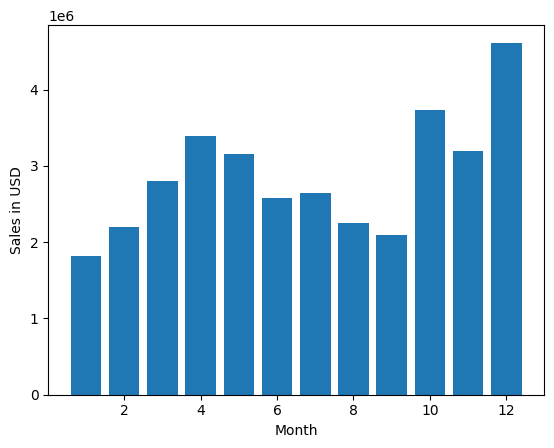

In [17]:
months = range(1,13)
plt.bar(months, results['Sales'])
plt.ylabel('Sales in USD')
plt.xlabel('Month')

In [32]:
results = df.groupby('City').sum()
results.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
City,,,,,,,,
Atlanta GA,1765641765711765821765891766231766271766341766...,USB-C Charging CableLightning Charging CableBo...,16602,2779908.20,04/12/19 10:5804/19/19 14:2904/27/19 12:2004/0...,"790 Ridge St, Atlanta, GA 30301253 Johnson St,...",104794,2795498.58
Austin TX,1765911766091766741766771766861767011767051767...,Apple Airpods HeadphonesApple Airpods Headphon...,11153,1809873.61,04/21/19 07:2104/11/19 16:5904/20/19 20:5304/0...,"600 Maple St, Austin, TX 73301267 11th St, Aus...",69829,1819581.75
Boston MA,1765591765661765781765811765851765851766001766...,Bose SoundSport HeadphonesWired HeadphonesAppl...,22528,3637409.77,04/07/19 22:3004/08/19 14:0504/09/19 23:3504/0...,"682 Chestnut St, Boston, MA 0221583 7th St, Bo...",141112,3661642.01
Dallas TX,1765581765691765701765771765961766021766101766...,USB-C Charging Cable27in 4K Gaming MonitorAA B...,16730,2752627.82,04/19/19 08:4604/16/19 19:2304/22/19 15:0904/0...,"917 1st St, Dallas, TX 75001657 Hill St, Dalla...",104620,2767975.40
Los Angeles CA,1765601765601765611765671765741765741765761765...,Google PhoneWired HeadphonesWired HeadphonesGo...,33289,5421435.23,04/12/19 14:3804/12/19 14:3804/30/19 09:2704/1...,"669 Spruce St, Los Angeles, CA 90001669 Spruce...",208325,5452570.80


Text(0.5, 0, 'City')

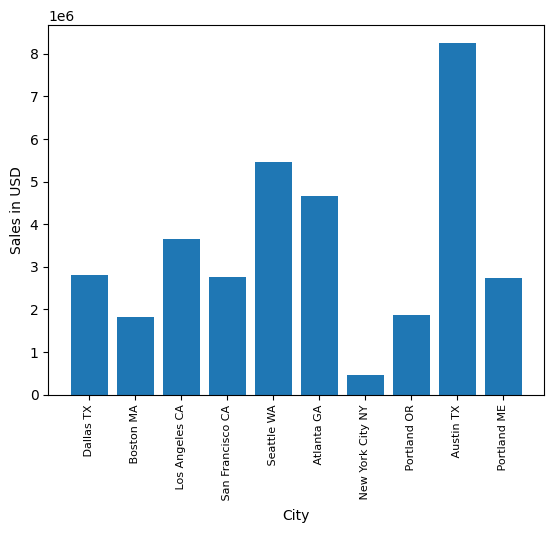

In [34]:
cities = df['City'].unique()

plt.bar(cities, results['Sales'])
plt.xticks(cities,rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD')
plt.xlabel('City')